In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
Co_ns = np.arange(5, 14)
Ru_dirs = ["Co_n-Ru_1", "Co_n-Ru_2", "Co_n-Ru_3"]
confs = ["FM", "AFM"]

In [3]:
def load(dir):
  # print("loading", dir)
  ene = np.genfromtxt(os.path.join(dir, "ene_vs_vol"))
  # mag_mom = np.genfromtxt(os.path.join(dir, "mag_mom_vs_vol"))
  mag = np.genfromtxt(os.path.join(dir, "mag_vs_vol"))
  pres = np.genfromtxt(os.path.join(dir, "pres_vs_vol"))
  return ene, mag, pres

def getJ(Ru, Co):
  fm = load(os.path.join(Ru, ))

def plot_ene(Ru, Co):
  fm = load(os.path.join(Ru, "FM", str(Co)))
  afm = load(os.path.join(Ru, "AFM", str(Co)))
  plt.plot(fm[0][:,0], fm[0][:,2], label="FM")
  plt.plot(afm[0][:,0], afm[0][:,2], label="AFM")
  plt.legend()



In [4]:
for Ru in Ru_dirs:
  for c in confs:
    for Co in Co_ns:
      try:
        res = load(os.path.join(Ru, c, str(Co)))
      except Exception:
        print(os.path.join(Ru, c, str(Co)))

Co_n-Ru_2/FM/13
Co_n-Ru_2/AFM/13
Co_n-Ru_3/FM/12
Co_n-Ru_3/FM/13
Co_n-Ru_3/AFM/12
Co_n-Ru_3/AFM/13


In [5]:
Js = {}
for Ru in Ru_dirs:
  Js[Ru] = []
  for Co in Co_ns:
    try:
      fm = load(os.path.join(Ru, "FM", str(Co)))
      afm = load(os.path.join(Ru, "AFM", str(Co)))
      J = fm[0][2,2] - afm[0][2,2]
      Js[Ru].append(J)
    except:
      pass

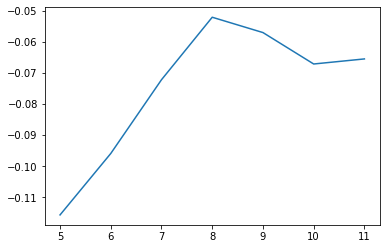

In [6]:
Ru_dir = Ru_dirs[2]
plt.plot(np.arange(len(Js[Ru_dir]))+5, Js[Ru_dir])

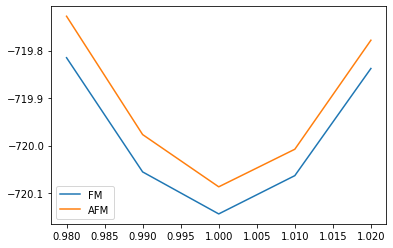

In [7]:
plot_ene(Ru_dir, 9)

In [8]:
for Ru_dir in Ru_dirs:
  print(Ru_dir, "J per atom [Ry]", Js[Ru_dir][-1]/16/13.6)  # 4 unique interaction pairs in each interface, double counting, 2 interfaces in the supercell

Co_n-Ru_1 J per atom [Ry] 0.0013758775735293312
Co_n-Ru_2 J per atom [Ry] 0.0007300709099264555
Co_n-Ru_3 J per atom [Ry] -0.0003010905790436796


In [6]:
Js['Co_n-Ru_3']

[-0.1157187400000339,
 -0.09594712000000527,
 -0.07220982000001186,
 -0.052103569999985666,
 -0.057034520000001976,
 -0.06714834000001701,
 -0.06551730999990468]

(-832.0, -831.9)

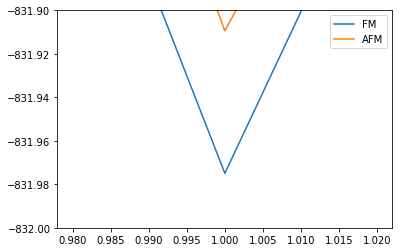

In [11]:
plot_ene("Co_n-Ru_3", 11)
plt.ylim(-832, -831.9)